<a href="https://colab.research.google.com/github/vicotrbb/data_science/blob/master/projects/fbprophet_stock_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
!pip install fbprophet

In [ ]:
from fbprophet import Prophet
from matplotlib import pyplot as plt
import numpy as np
import yfinance as yf
import pandas as pd

In [ ]:
aapl = yf.Ticker('AAPL')
df = aapl.history(period='max', interval="1d")
df = df[['Low']]
df['date'] = pd.to_datetime(df.index)
df.set_index('date', inplace=True)

In [ ]:
X = df.index.values
y = df['Low'].values

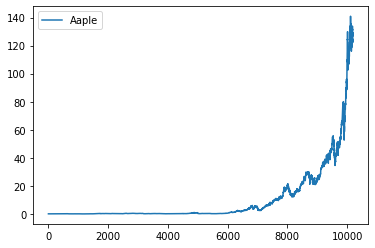

In [ ]:
plt.plot(range(0,len(y)),y, label='Aaple')
plt.legend()
plt.show()

In [ ]:
stock_data = pd.DataFrame({'ds': X, 'y': y})

In [ ]:
stock_data.head()

,ds,y
0,1980-12-12,0.100751
1,1980-12-15,0.095495
2,1980-12-16,0.088485
3,1980-12-17,0.090676
4,1980-12-18,0.093304


In [ ]:
stock_data.tail()

,ds,y
10186,2021-05-07,129.479996
10187,2021-05-10,126.809998
10188,2021-05-11,122.769997
10189,2021-05-12,122.250000
10190,2021-05-13,124.410004


In [ ]:
model = Prophet(daily_seasonality=True)
model.fit(stock_data)

In [ ]:
future = model.make_future_dataframe(periods=365)
prediction = model.predict(future)

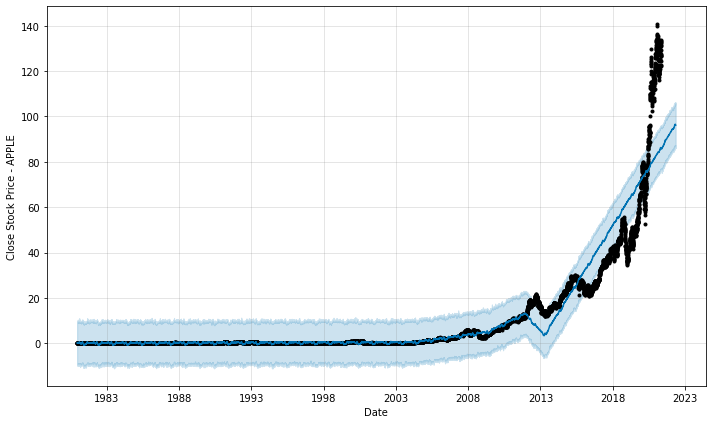

In [ ]:
model.plot(prediction)
plt.xlabel("Date")
plt.ylabel("Close Stock Price - APPLE")
plt.show()